In [32]:
from tensorflow import keras
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

import pandas as pd 
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import plotly 
import plotly.express as px
import plotly.graph_objects as go

In [33]:
#reading the
training = pd.read_csv(r'training.csv', header = 0)
display(training)

,A,B,C,D,E,OUTPUT
0,1,1,1,0,0,1
1,1,1,1,0,1,1
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,1,0,0,1
5,0,0,1,0,1,1
6,0,0,1,1,0,1
7,0,0,1,1,1,1
8,0,1,0,0,0,0
9,0,1,0,0,1,0


In [34]:
#splitting the training set into data and target
training_arr = training.values
data_input = training_arr[:,0:5]
data_output = training_arr[:,5]

# Splitting the data into a training set and a test set
testing_set_size = 0.2

input_train, input_test, output_train, output_test = train_test_split(
data_input, data_output, test_size=testing_set_size, random_state=0)


In [35]:
#creating the keras model with 2 hidden layers with 3 and 2 nodes on each
model = Sequential()
model.add(Dense(3, input_shape=(5,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:


# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fitting the model to the dataset we got
history = model.fit(input_train, output_train, validation_split=0.2, epochs=100,batch_size=10)

# evaluate the model and print out the accuracy 
_, accuracy = model.evaluate(input_test, output_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
2/2 [==============================] - 1s 367ms/step - loss: 0.6931 - accuracy: 0.3333 - val_loss: 0.6922 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6926 - accuracy: 0.7333 - val_loss: 0.6913 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6922 - accuracy: 0.7333 - val_loss: 0.6903 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 0.6918 - accuracy: 0.7333 - val_loss: 0.6894 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6913 - accuracy: 0.7333 - val_loss: 0.6885 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6910 - accuracy: 0.7333 - val_loss: 0.6876 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6905 - accuracy: 0.7333 - val_loss: 0.6868 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 69ms/step - loss: 0.6710 - accuracy: 0.7333 - val_loss: 0.6434 - val_accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 73ms/step - loss: 0.6706 - accuracy: 0.7333 - val_loss: 0.6427 - val_accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6704 - accuracy: 0.7333 - val_loss: 0.6420 - val_accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 77ms/step - loss: 0.6700 - accuracy: 0.7333 - val_loss: 0.6413 - val_accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 80ms/step - loss: 0.6697 - accuracy: 0.7333 - val_loss: 0.6406 - val_accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 71ms/step - loss: 0.6693 - accuracy: 0.7333 - val_loss: 0.6399 - val_accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6691 - accuracy: 0.7333 - val_loss: 0.6392 - val_accuracy: 1.0000
Epoch 66/100
2/2 [========

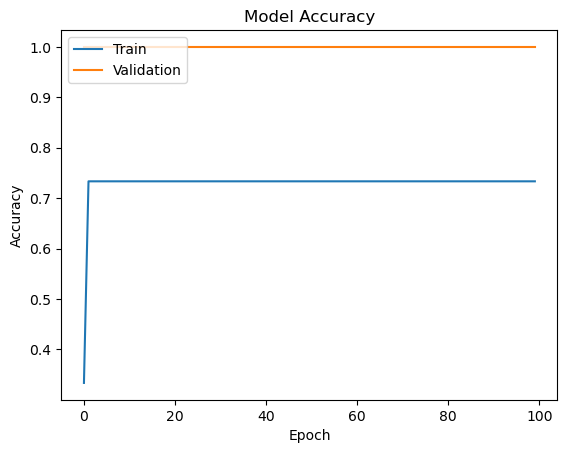

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

In [38]:
test = pd.read_csv(r'test.csv', header = 0)
display(test)

,A,B,C,D,E,OUTPUT
0,1,1,0,0,0,1
1,1,1,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,1,1,0,1,0,1
5,1,1,0,1,1,1
6,1,1,1,1,0,1
7,1,1,1,1,1,1


In [39]:
test_arr = test.values
test_input = test_arr[:,0:5]
test_output = test_arr[:,5]


# evaluate the keras model
_, accuracy = model.evaluate(test_input, test_output)
print('Accuracy: %.2f' % (accuracy*100))


1/1 [==============================] - 0s 33ms/step - loss: 0.6549 - accuracy: 0.7500
Accuracy: 75.00


How many hidden layers have you used? And why?
 - We used 2 hidden layers.
 - The data set, that we have, contains only 5 features. Since it has fewer deatures, it is better to go with 1 or 2 hidden layer.
 - Also, we need to remember that using more hidden layer will increase the complexity of the model
 
How many nodes in each hidden layer and why that number of nodes in particular?
 - 
 
What is the activation function that you used and why? Did you use the same activation function in all layers? Why?
 - 
 
What learning algorithm did you use to train the neural net and why?
- 

Can you use one hidden layer only to solve this problem? If yes, how many nodes are you going to have in it? And why?
- 

Can we use 5 hidden layers? Is that a good idea? Justify your answer.
- 

How did the neural net do in classifying the testing set? Comment on how good or bad it learned the function from the training set.
- 
